# Conversions based on Source, Visits, Likes, Shares and Comments
- Comparing Random Forest Classification and Logistic Regression to predict the Conversions

In [3]:
# Extraction and Exploration
import pandas as pd  # for dataframes
import numpy as np
%matplotlib inline
from matplotlib import pyplot
import matplotlib.pyplot as plt # for plotting graphs
from plotly import graph_objs as go
import seaborn as sns # for plotting graphs
# Predictive Analytics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix 


In [9]:
import pandas as pd
data=pd.read_csv('https://raw.githubusercontent.com/ShailuSurya/ContentEngagement/master/ContentEngagement%20Dataset.csv')
data.head(5)

,Unnamed: 0,StateCode,Source,SourceCode,new_user,Number_of_visits,likes,shares,Comments,age,total_pages_visited,session_duration(min),conversion
0,Washington,1,LinkedIn,1,1,1,1,0,1,23,2,5,1
1,Washington,1,LinkedIn,1,0,2,1,1,0,23,4,2,0
2,Washington,1,Chicago Business Journal,2,0,3,1,1,1,32,1,5,1
3,Washington,1,LinkedIn,1,1,1,1,0,0,26,1,10,1
4,California,2,LinkedIn,1,1,2,1,0,0,27,1,2,0


In [11]:
# Any Missing Values
data.isnull().values.any()

False

In [10]:
print("shape of dataset is", data.shape)

shape of dataset is (213, 17)


In [12]:
data.describe()
data.dtypes

Unnamed: 0               object
StateCode                 int64
Source                   object
SourceCode                int64
new_user                  int64
Number_of_visits          int64
likes                     int64
shares                    int64
Comments                  int64
age                       int64
total_pages_visited       int64
session_duration(min)     int64
conversion                int64
dtype: object

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

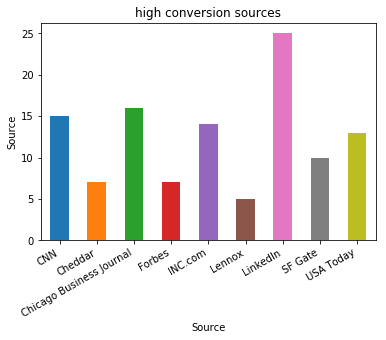

In [13]:
# Top Publishers that has high conversions
conv_data=data.groupby('Source')['conversion'].sum().plot(kind='bar')
plt.ylabel('Source')
plt.title("high conversion sources")
plt.setp(conv_data.get_xticklabels(), rotation=30, horizontalalignment='right')


# To understand what factors influence the conversion of customers mostly
- I used Random Forest Classification algorithm to predict the conversion rate 
- I used shares, likes, website name, total pasges visited, session duration, new user
- I converted the factor variavles into categorical type first
- After I trained the model using 70% of data and tested the model using 30% of data

In [14]:
# data['conversion'] = pd.Categorical(data.conversion)
data['likes'] = pd.Categorical(data.likes)
data['shares'] = pd.Categorical(data.shares)
data['new_user'] = pd.Categorical(data.new_user)
data['Source'] = pd.Categorical(data.Source)
data['SourceCode'] = pd.Categorical(data.SourceCode)
data['Comments']=pd.Categorical(data.Comments)
data.dtypes

Unnamed: 0                 object
StateCode                   int64
Source                   category
SourceCode               category
new_user                 category
Number_of_visits            int64
likes                    category
shares                   category
Comments                 category
age                         int64
total_pages_visited         int64
session_duration(min)       int64
conversion                  int64
dtype: object

In [16]:
X=data[['StateCode','SourceCode','likes','shares','Comments','Number_of_visits','new_user','age','total_pages_visited','session_duration(min)']] # inputs
y=data['conversion'] # output

# Split dataset into training set and test set
# implementing train-test-split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=66)


In [17]:
# KNowing the dimensions
X_train.shape
y_train.shape
X_test.shape

(71, 10)

In [18]:

# Traing the model
rf_model=RandomForestClassifier(n_estimators=600)
print(rf_model.fit(X_train,y_train))
# testing the model
y_predict=rf_model.predict(X_test)
# Finidng the Accuracy
rf_model.score(X_test,y_test)

cm=confusion_matrix(y_test, y_predict)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


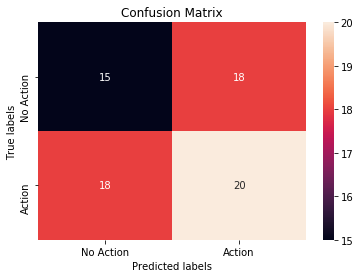

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['No Action', 'Action']); ax.yaxis.set_ticklabels(['No Action', 'Action']);

In [20]:
# Prediction
y_predict=rf_model.predict(X_test)
rf_model.score(X_test,y_test)


0.49295774647887325

In [21]:
# Accuracy
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))

Accuracy: 0.49295774647887325


In [44]:
print(X)
print(y_predict)

     StateCode SourceCode likes shares Comments  Number_of_visits new_user  \
0            1          1     1      0        1                 1        1   
1            1          1     1      1        0                 2        0   
2            1          2     1      1        1                 3        0   
3            1          1     1      0        0                 1        1   
4            2          1     1      0        0                 2        1   
5            2          2     1      0        1                 1        0   
6            2          3     1      0        0                 2        1   
7            2          4     0      1        1                 1        0   
8            3          5     0      1        0                 2        1   
9            3          5     1      0        1                 1        0   
10           3          2     0      1        1                 1        1   
11           3          1     0      0        1                 

In [20]:
# I have given random inputs to predict the conversions 
predictions=pd.DataFrame(rf_model.predict([[2,7,1,1, 0 ,1, 1,23, 3,3,], # 2-California,7- SF Gate 
                  [7,8, 0,0, 1, 3, 0, 32,1, 1],# 7-Washington, 8-Yellow pages
                  [3,4, 0,1, 1, 2, 1, 25,1, 4]]) # 3- Texas ,  4-Forbes
            )
predictions


,0
0,0
1,1
2,1


In [22]:

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_predict))

print("=== Classification Report ===")
print(classification_report(y_test, y_predict))



=== Confusion Matrix ===
[[15 18]
 [18 20]]
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.45      0.45      0.45        33
           1       0.53      0.53      0.53        38

   micro avg       0.49      0.49      0.49        71
   macro avg       0.49      0.49      0.49        71
weighted avg       0.49      0.49      0.49        71



In [23]:
# Displaying the most important variable for the model
# importances = rf_model.feature_importances
for feature in zip(X, rf_model.feature_importances_):
    print(feature)


('StateCode', 0.15957572899962488)
('SourceCode', 0.11980994263620773)
('likes', 0.037745308817826735)
('shares', 0.034859596803884105)
('Comments', 0.05330508031627316)
('Number_of_visits', 0.08432980260581664)
('new_user', 0.03843203914372563)
('age', 0.19536090563453992)
('total_pages_visited', 0.12366752672668133)
('session_duration(min)', 0.15291406831542004)


In [23]:

feature_importances = pd.DataFrame(rf_model.feature_importances_,
                                index= X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
age,0.197100
StateCode,0.162216
session_duration(min),0.147600
total_pages_visited,0.128525
SourceCode,0.118377
Number_of_visits,0.086204
Comments,0.051302
new_user,0.039487
likes,0.035281
shares,0.033908


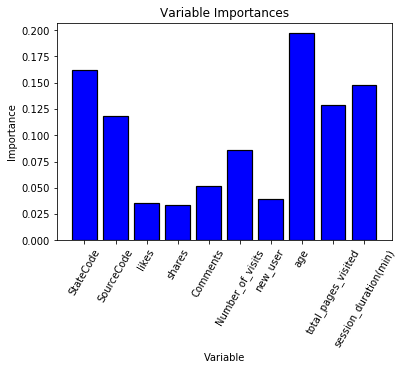

In [24]:
importances = list(rf_model.feature_importances_)
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'b', edgecolor = 'k', linewidth = 1.2)
# Tick labels for x axis
plt.xticks(x_values, X_train.columns, rotation=60)
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

# Logistic Regression

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [37]:
logistic_regression= LogisticRegression()
x=logistic_regression.fit(X_train,y_train)
modelpred=logistic_regression.predict(X_test)
print(x)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


C:\Users\saila\Anaconda3\New\envs\py37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



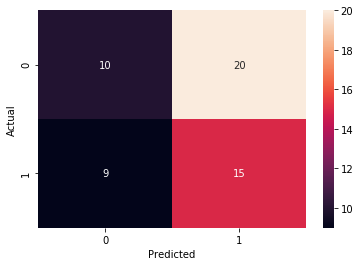

In [31]:
confusion_matrix = pd.crosstab(y_test, modelpred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [32]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.46296296296296297


In [42]:
print(X)
print(modelpred)


     StateCode SourceCode likes shares Comments  Number_of_visits new_user  \
0            1          1     1      0        1                 1        1   
1            1          1     1      1        0                 2        0   
2            1          2     1      1        1                 3        0   
3            1          1     1      0        0                 1        1   
4            2          1     1      0        0                 2        1   
5            2          2     1      0        1                 1        0   
6            2          3     1      0        0                 2        1   
7            2          4     0      1        1                 1        0   
8            3          5     0      1        0                 2        1   
9            3          5     1      0        1                 1        0   
10           3          2     0      1        1                 1        1   
11           3          1     0      0        1                 